<a href="https://colab.research.google.com/github/Indian966/JBNU_BigData_Analyze/blob/master/Cluster_Analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)

data.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
feature = data[ ['Sepal length','Sepal width','Petal length','Petal width']]
feature.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns

# create model and prediction
model = KMeans(n_clusters=3,algorithm='auto')
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

print(r)

     Sepal length  Sepal width  Petal length  Petal width  predict
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        1
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        1

[150 rows x 5 columns]


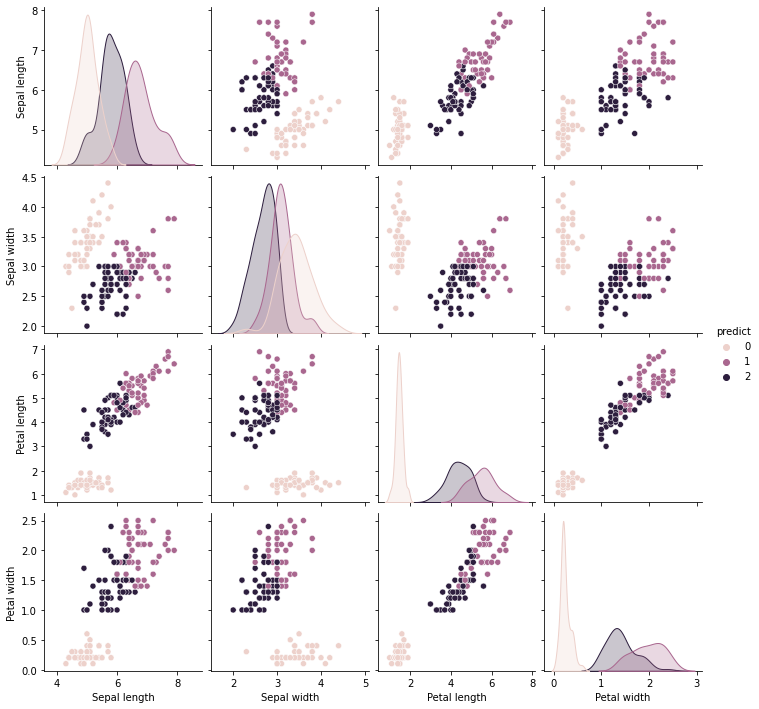

In [10]:
sns.pairplot(r,hue='predict')
plt.show()

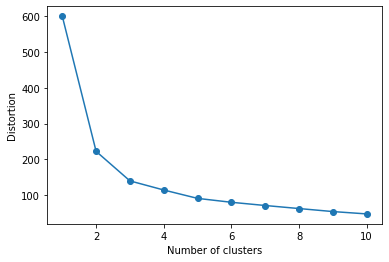

In [9]:
from sklearn.preprocessing import StandardScaler
feature_scaled = StandardScaler().fit_transform(feature)

distortions = []
for i in range(1, 11):
  kmeans_i = KMeans(n_clusters = i, random_state = 0) #모델 생성
  kmeans_i.fit(feature_scaled) #모델 훈련
  distortions.append(kmeans_i.inertia_)
plt.plot(range(1,11), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

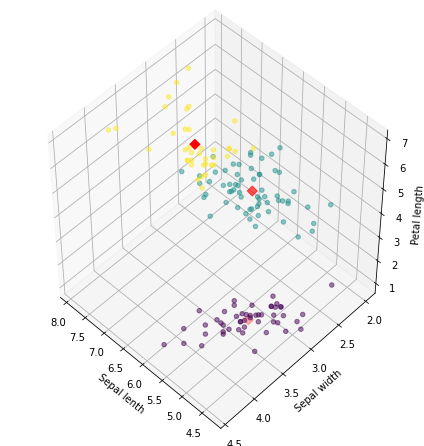

In [5]:
centers = pd.DataFrame(model.cluster_centers_,columns=['Sepal length','Sepal width','Petal length','Petal width'])
center_x = centers['Sepal length']
center_y = centers['Sepal width']
center_z = centers['Petal length']

from mpl_toolkits.mplot3d import Axes3D
# scatter plot
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(r['Sepal length'],r['Sepal width'],r['Petal length'],c=r['predict'],alpha=0.5)
ax.scatter(center_x,center_y,center_z,s=50,marker='D',c='r')
ax.set_xlabel('Sepal lenth')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.show()

In [6]:
ct = pd.crosstab(data['labels'],r['predict'])
print (ct)
print (model.inertia_)

predict   0   1   2
labels             
0        50   0   0
1         0  48   2
2         0  14  36
78.851441426146


In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
model = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler,model)
pipeline.fit(feature)
predict = pd.DataFrame(pipeline.predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

ct = pd.crosstab(data['labels'],r['predict'])
print (ct)
print (model.inertia_)

predict   0   1   2
labels             
0        50   0   0
1         0  11  39
2         0  36  14
139.82049635974974


In [13]:
from matplotlib import cm
def clusterScatter(n_cluster, X_features):
  c_colors = []
  kmeans = KMeans(n_clusters = n_cluster, random_state = 0)
  Y_labels = kmeans.fit_predict(X_features)
  for i in range(n_cluster):
    c_color = cm.jet(float(i) / n_cluster) #클러스터의 색상 설정
    c_colors.append(c_color)
    #클러스터의 데이터 분포를 동그라미로 시각화
    plt.scatter(X_features[Y_labels == i,0], X_features[Y_labels == i,1], marker = 'o', color = c_color, edgecolor = 'black', s = 50, label =
    'cluster '+ str(i))
  #각 클러스터의 중심점을 삼각형으로 표시
  for i in range(n_cluster):
    plt.scatter(kmeans.cluster_centers_[i,0], kmeans.cluster_centers_[i,1], marker = '^', color = c_colors[i], edgecolor = 'w', s = 200)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

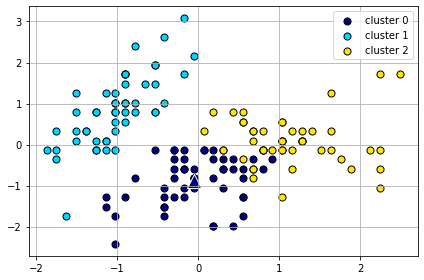

No handles with labels found to put in legend.


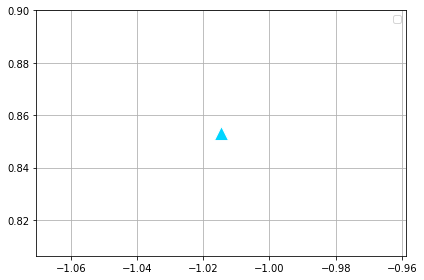

No handles with labels found to put in legend.


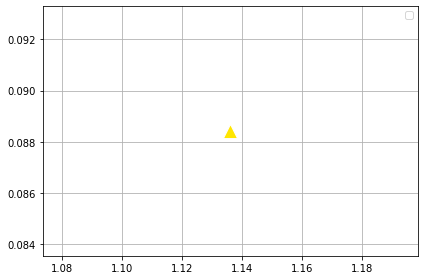

In [16]:
clusterScatter(3, feature_scaled)